In [23]:
import iris
import iris.plot as iplt
import matplotlib.pyplot as plt
import numpy

In [3]:
frames_a = iris.load('/scratch/hc46/saw562/nri-workshop-tutorial/barra-frames/20200119T1800Z/frame_barra-a')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/iris/coords.py:2047: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/iris/coords.py:2047: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


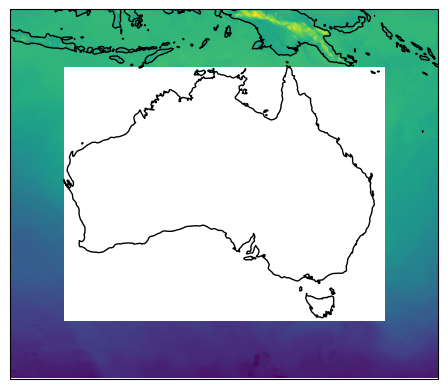

In [9]:
iplt.pcolormesh(frames_a[1][0,0,:,])
plt.gca().coastlines()

In [15]:
vmin, vmax = frames_a[1][0,0,:,].data.min(), frames_a[1][0,0,:,].data.max()

In [10]:
frames_se = iris.load('/scratch/hc46/saw562/nri-workshop-tutorial/barra-frames/20200119T1800Z/frame_barra-se', vmin=vmin, vmax=vmax)
frames_sw = iris.load('/scratch/hc46/saw562/nri-workshop-tutorial/barra-frames/20200119T1800Z/frame_barra-sw', vmin=vmin, vmax=vmax)
frames_nau = iris.load('/scratch/hc46/saw562/nri-workshop-tutorial/barra-frames/20200119T1800Z/frame_barra-nau')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/iris/coords.py:2047: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/iris/coords.py:2047: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/iris/coords.py:2047: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/iris/coords.py:2047: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/iris/coords.py:2047: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warning

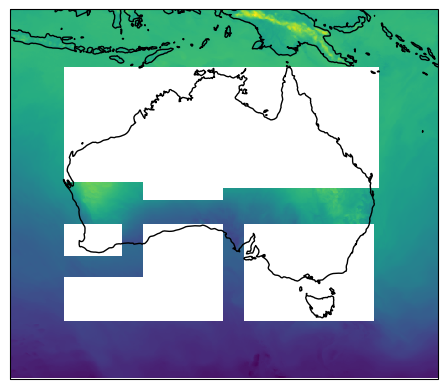

In [17]:
iplt.pcolormesh(frames_a[1][0,0,:,], vmin=vmin, vmax=vmax)
iplt.pcolormesh(frames_se[1][0,0,:,], vmin=vmin, vmax=vmax)
iplt.pcolormesh(frames_sw[1][0,0,:,], vmin=vmin, vmax=vmax)
iplt.pcolormesh(frames_nau[1][0,0,:,], vmin=vmin, vmax=vmax)
plt.gca().coastlines()

In [66]:
def draw_bbox(cube, ax, **kwargs):
    x, y = iris.analysis.cartography.get_xy_grids(cube)
    
    plt.plot(x[0,:], y[0,:], **kwargs)
    plt.plot(x[-1,:], y[-1,:], **kwargs)
    plt.plot(x[:,0], y[:,0], **kwargs)
    plt.plot(x[:,-1], y[:,-1], **kwargs)

def outline_frame(frame, ax=None, **kwargs):
    mask = frame.data.mask
    
    left = numpy.where(~mask[frame.shape[0]//2,0:frame.shape[1]//2])[0]
    outer_left = left.min()
    inner_left = left.max()
    
    right = numpy.where(~mask[frame.shape[0]//2,frame.shape[1]//2:])[0]
    outer_right = right.max()+frame.shape[1]//2
    inner_right = right.min()+frame.shape[1]//2
    
    top = numpy.where(~mask[0:frame.shape[0]//2,frame.shape[1]//2])[0]
    outer_top = top.min()
    inner_top = top.max()
    
    bot = numpy.where(~mask[frame.shape[0]//2:,frame.shape[1]//2])[0]
    outer_bot = bot.max()+frame.shape[0]//2
    inner_bot = bot.min()+frame.shape[0]//2
    
    if ax is None:
        ax = plt.gca()
        
    draw_bbox(frame[outer_top:outer_bot, outer_left:outer_right], ax=ax, ls='--', **kwargs)
    draw_bbox(frame[inner_top:inner_bot, inner_left:inner_right], ax=ax, ls=':', **kwargs)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/iris/coords.py:2047: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/iris/coords.py:2047: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/iris/coords.py:2047: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/iris/coords.py:2047: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/iris/coords.py:2047: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warning

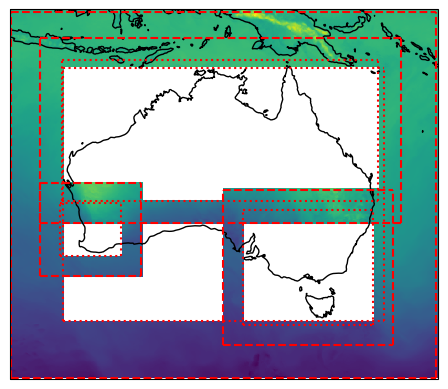

In [69]:
iplt.pcolormesh(frames_a[1][0,0,:,], vmin=vmin, vmax=vmax)
iplt.pcolormesh(frames_se[1][0,0,:,], vmin=vmin, vmax=vmax)
iplt.pcolormesh(frames_sw[1][0,0,:,], vmin=vmin, vmax=vmax)
iplt.pcolormesh(frames_nau[1][0,0,:,], vmin=vmin, vmax=vmax)
plt.gca().coastlines()
    
outline_frame(frames_sw[1][0,0,:,], color='r')
outline_frame(frames_a[1][0,0,:,], color='r')
outline_frame(frames_se[1][0,0,:,], color='r')
outline_frame(frames_nau[1][0,0,:,], color='r')

In [33]:
numpy.where(~outline_frame(frames_sw[1][0,0,:,]))[0]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])

In [45]:
frames_sw[1][0,0,:,].coord('latitude').points

array([-38.28    , -38.17    , -38.059998, -37.949997, -37.84    ,
       -37.73    , -37.62    , -37.51    , -37.399998, -37.289997,
       -37.18    , -37.07    , -36.96    , -36.85    , -36.739998,
       -36.629997, -36.52    , -36.41    , -36.3     , -36.19    ,
       -36.079998, -35.969997, -35.86    , -35.75    , -35.64    ,
       -35.53    , -35.42    , -35.309998, -35.199997, -35.09    ,
       -34.98    , -34.87    , -34.76    , -34.649998, -34.539997,
       -34.43    , -34.32    , -34.21    , -34.1     , -33.989998,
       -33.879997, -33.77    , -33.66    , -33.55    , -33.44    ,
       -33.329998, -33.219997, -33.11    , -33.      , -32.89    ,
       -32.78    , -32.67    , -32.559998, -32.449997, -32.34    ,
       -32.23    , -32.12    , -32.01    , -31.899998, -31.789999,
       -31.679998, -31.57    , -31.46    , -31.349998, -31.239998,
       -31.13    , -31.019999, -30.91    , -30.8     , -30.689999,
       -30.579998, -30.47    , -30.359999, -30.25    , -30.14 

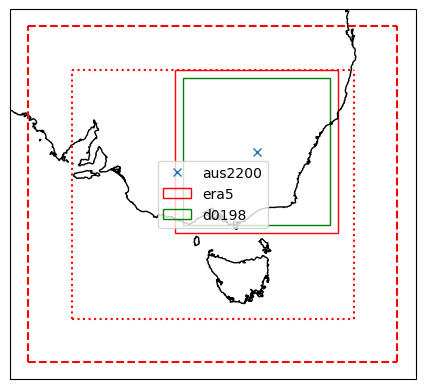

In [70]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpp
import cartopy.crs as ccrs

def draw_regn(ax, centre, **kwargs):
    ax.plot(centre[1], centre[0], 'x', **kwargs)
    
def draw_res(ax, centre, delta, npts, **kwargs):
    ax.add_patch(mpp.Rectangle([centre[1]-npts[1]/2*delta[1], centre[0]-npts[0]/2*delta[0]], npts[1]*delta[1], npts[0]*delta[0], fill=False, **kwargs))
    
ax = plt.axes(projection=ccrs.PlateCarree())

# Draw the region
centre = [-34.43, 147.615]
draw_regn(ax, centre, label='aus2200')

# Draw the resolutions
draw_res(ax, centre, delta=[0.0198, 0.0198], npts=[500, 500], label='era5', color='red')
draw_res(ax, centre, delta=[0.0198, 0.0198], npts=[450, 450], label='d0198', color='green')

ax.coastlines('10m')
plt.legend();


outline_frame(frames_se[1][0,0,:,], color='r')